# Relatórios de Análise VII

## Criando Agrupamentos

In [37]:
import pandas as pd

In [38]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [39]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,casas
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,casas
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,casas
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [40]:
dados['Valor'].mean()

5086.237660471798

In [41]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [42]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [43]:
grupo_bairro = dados.groupby('Bairro')

In [44]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [45]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21520, 21522, 21525, 21533, 21551, 21552, 21562, 21563, 21564,
             21571],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    86,    87,   110,   118,   126,   133,   195,
               199,
             ...
             21226, 21242, 21254, 21284, 21406, 21413, 21419, 21468, 21498,
             21541],
            dtype='int64', length=863),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    85,
                90,
             ...
             21460, 21466, 21488, 21495, 21531, 21534, 21546, 21560, 21561,
             21566],
            dtype='int64', length=2642),
 'Flamengo': Int64Index([   78,   137,   216,   281,   317,   342,   351,   356,   364,
               388,
             ...
             21282, 21315, 21336, 21383, 21433, 21457, 21480, 21483, 21492,
  

In [46]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [47]:
for bairro, data in grupo_bairro:                         # calculo valor médio p/ cada bairro
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8843.587485515643
Copacabana -> 4126.583648750946
Flamengo -> 4112.56381486676
Ipanema -> 9353.90243902439
Leblon -> 8746.344992050874
Tijuca -> 2037.8175115207373


In [48]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8843.59,986.16
Copacabana,4126.58,1149.42
Flamengo,4112.56,1103.70
Ipanema,9353.90,2245.72
Leblon,8746.34,2107.18
Tijuca,2037.82,719.72


## Estatísticas Descritivas

In [49]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,863.0,8843.59,153081.72,700.0,2200.0,3000.0,4332.5,4500000.0
Copacabana,2642.0,4126.58,3612.61,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,713.0,4112.56,3841.73,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1763.0,9353.90,8221.66,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1085.0,2037.82,1671.27,750.0,1500.0,1800.0,2300.0,45000.0


In [50]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7632016.0
Copacabana,100.0,35000.0,10902434.0
Flamengo,800.0,35000.0,2932258.0
Ipanema,1200.0,90000.0,16490930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2211032.0


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

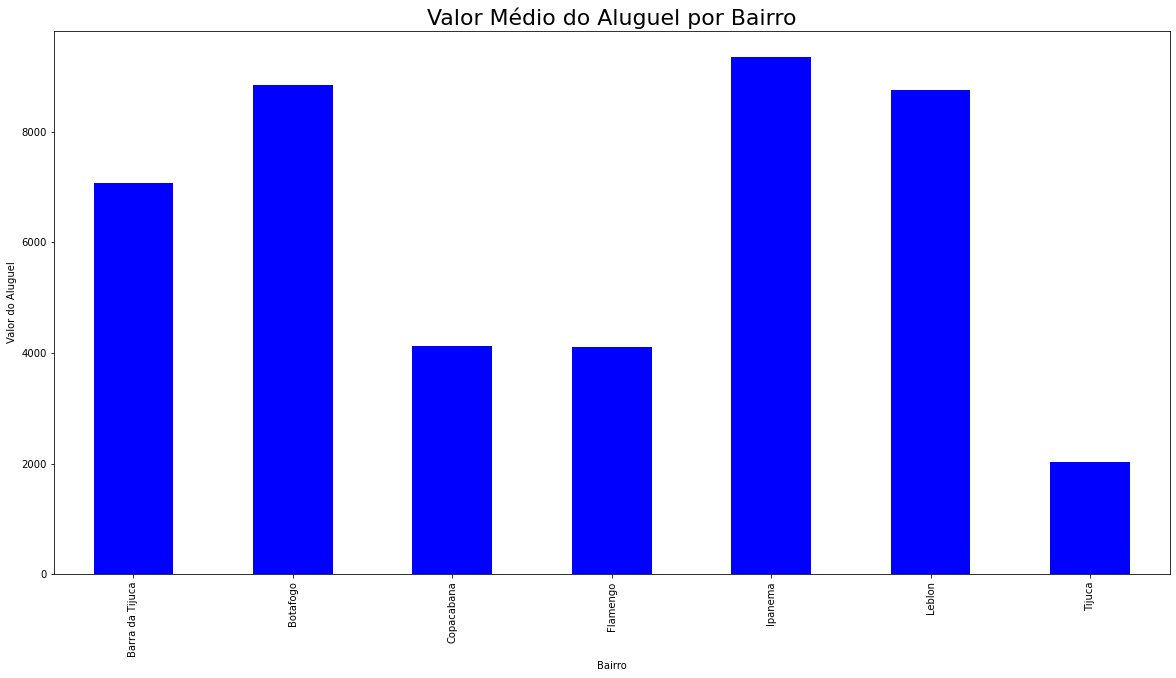

In [54]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

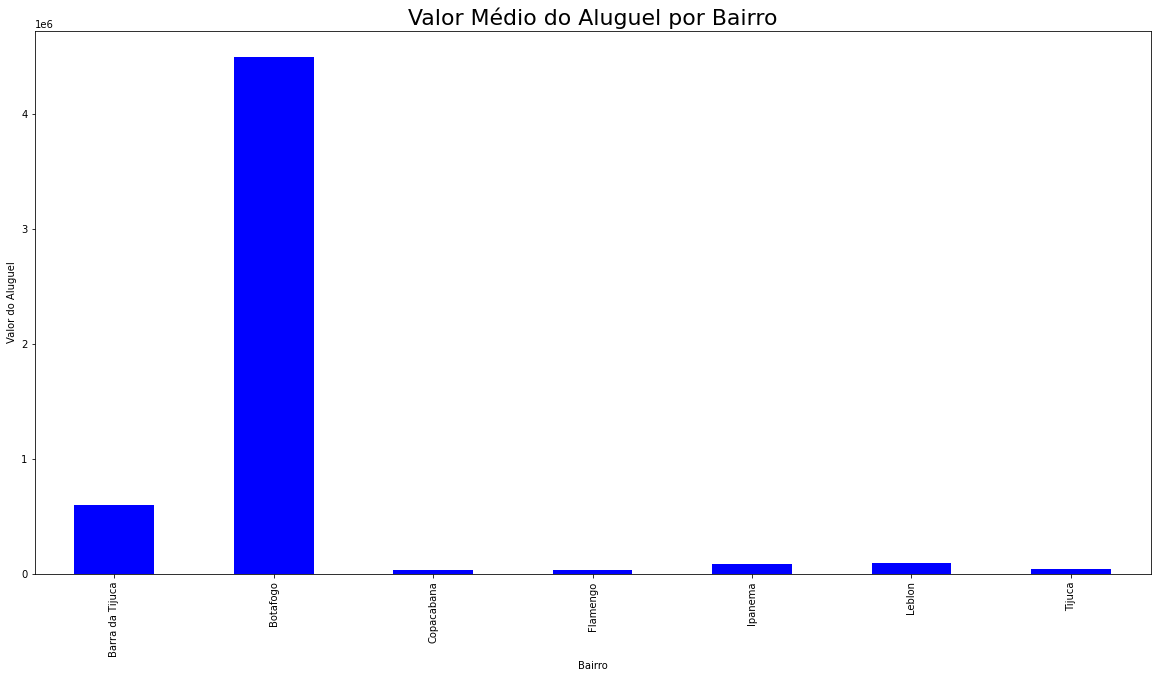

In [56]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')          # valor máximo
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})